---
# Learner: Using Seaborn for Statistical Data Visualization

This notebook is my attempt at learning the workflow commonly found in the data science field through the project course I took from Coursera.  See the Readme file for detailed description.

The following walks through the methods for statistical data visualization specifically using Seaborn.  It attempts to outline procedures for discovering the best model satisfying the objective.  

It covers:  
Objective  
EDA (Exploratory Data Analysis)  
Modeling  

All codes from the lab with some editing for clarity.

## Loading Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

### Data examination using descriptive statistics.

In [2]:
data = pd.read_csv('./breast_cancer_clf/data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
# data size, useful when comparing data subsets
data.shape

(569, 33)

In [22]:
# identify data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

---
## Exploratory Data Analysis

### For best practice, use subset data from raw data.  
x, y are the subset data for modeling.  x contains the features or predictors while y is the response variable, 'diagnosis.' 

In [24]:
col = data.columns
print(col)
y = data.diagnosis              # subset data for the quantitative response variable
drop_cols = ['Unnamed: 32','id','diagnosis']    # remove unwanted columns for the feature subset
x = data.drop(drop_cols, axis=1 )
x.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
## Data Visualization  
Sample plots to show various ways to inspect the data visually.

### Plot Diagnosis Distributions  

Good practice to visualize the response variable to gain insights on progressing with the analysis.  In this case, this response only has 2 elements and confirms the binary classification approach.

Number of Benign:  357
Number of Malignant:  212


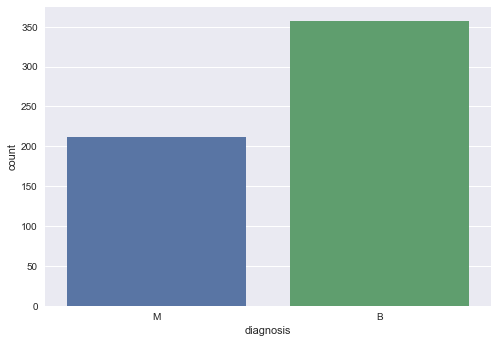

In [10]:
ax = sns.countplot(y, label='Count')
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [11]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Sample plots using Seaborn.  
Violin plots, showing only first group of features.  In order to compare data across different features, it will use normalization.

In [27]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

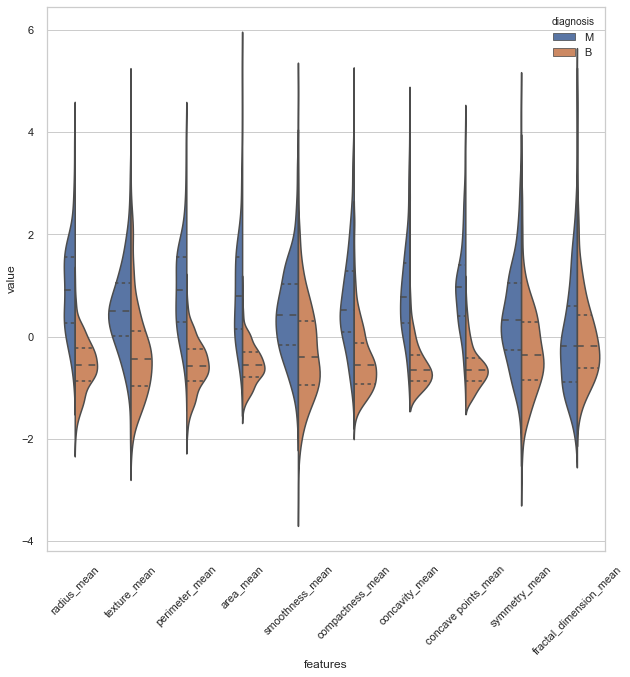

In [28]:
# plot
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45)

#### box plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

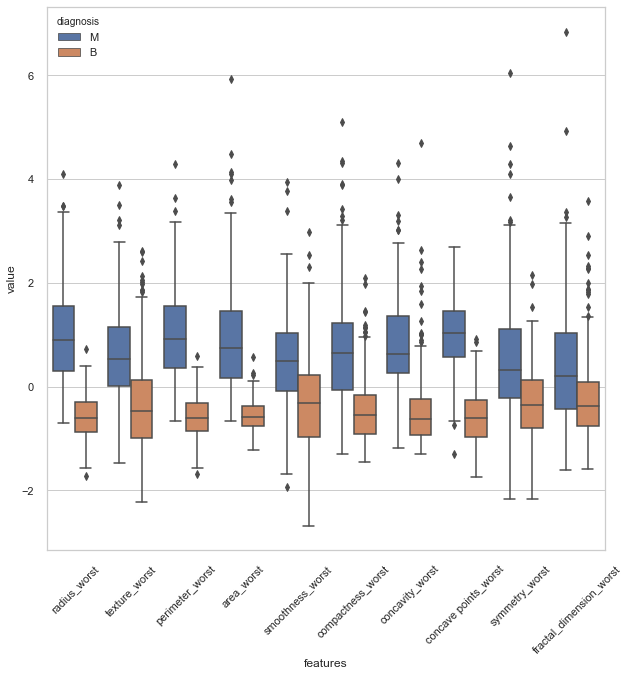

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

#### Joint Plots for Feature Comparison

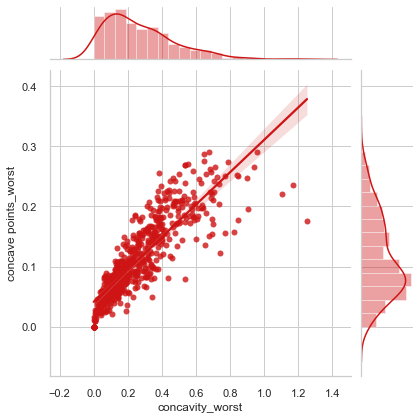

In [32]:
sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind='regg', color='#ce1414')

#### Uncovering Correlated Features with Pair Grids  

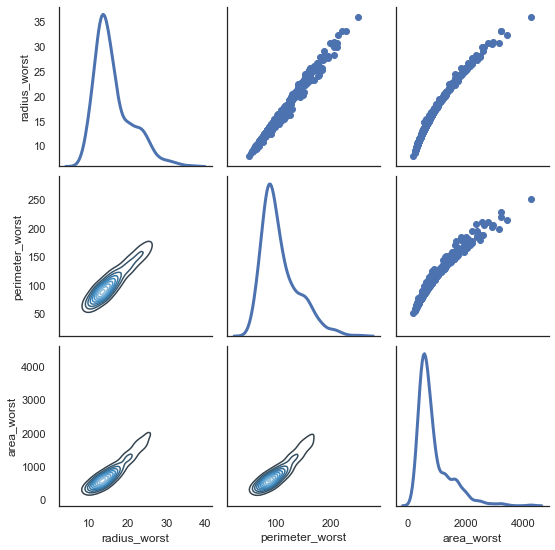

In [33]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

#### Observing the Distribution of Values and Their Variance with Swarm Plots  
Showing only first set of features.

In [34]:
# normalize
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

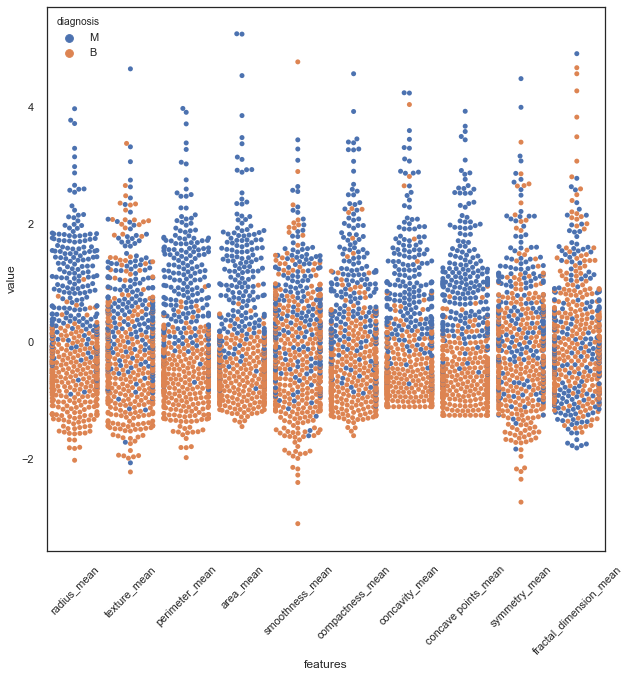

In [35]:
# plot
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

### Observing all Pair-wise Correlations
Heatmaps are one of the best methods for visually inspecting correlations.

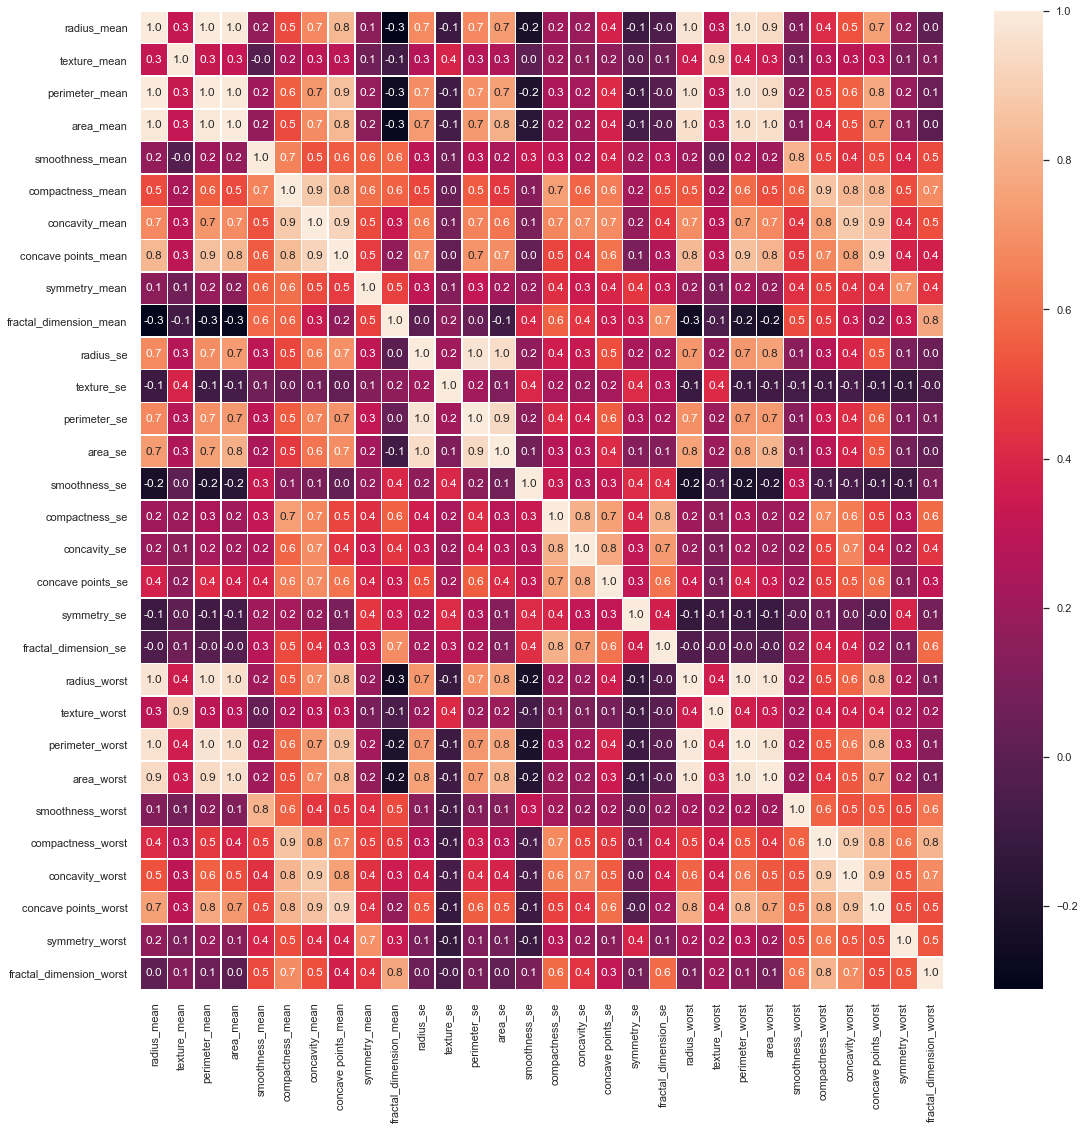

In [36]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)

---
## Dropping Correlated Columns from Feature Matrix

In [38]:

drop_cols = [ 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
	'perimeter_se','radius_worst','perimeter_worst','compactness_worst',
	'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst' ]
df = x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [39]:
# verify the number of columns and size from original dataset
df.shape

(569, 16)

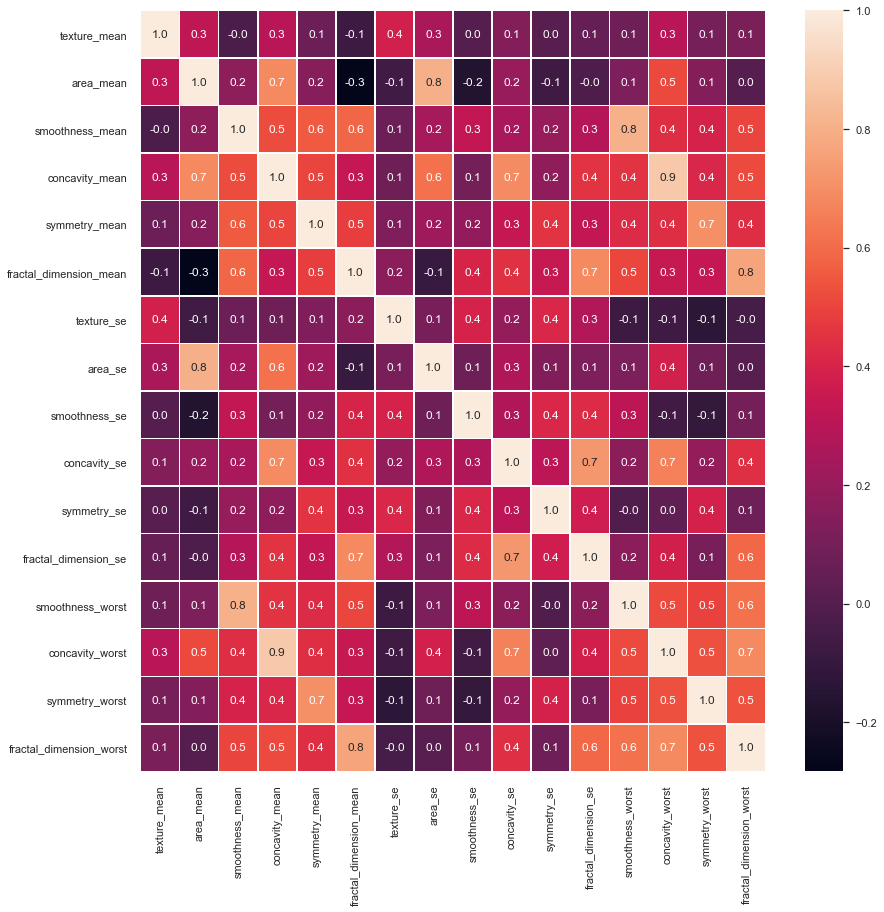

In [40]:
# replot to visually inspect, no correlation, 1.0, in the plot
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)

---
## Modeling
### Classification using XGBoost

In [41]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy value:  0.9766081871345029


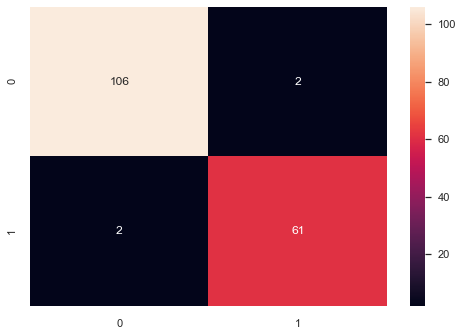

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

clf_rf = xgb.XGBClassifier(random_state=42)      
clr_rf = clf_rf.fit(X_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy value: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

### Univariate Feature Selection

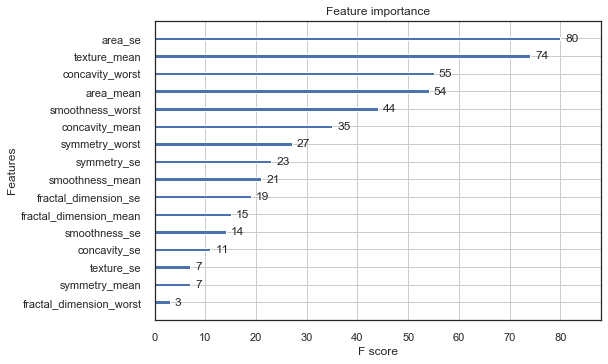

In [43]:
from xgboost import plot_importance
plot_importance(clf_rf, )

### Recursive Feature Elimination with Cross-Validation

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy:  0.9707602339181286


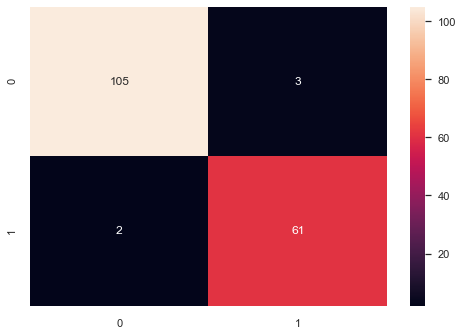

In [45]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)

clf_rf_2 = xgb.XGBClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2, y_train)

ac_2 = accuracy_score(y_test, clf_rf_2.predict(X_test_2))
print('Accuracy: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2, annot=True, fmt="d")

### Plot CV Scores vs Number of Features Selected

In [46]:
from sklearn.feature_selection import RFECV

clf_rf_4 = xgb.XGBClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='accuracy')   
rfecv = rfecv.fit(X_train, y_train)
ac_3 = accuracy_score(y_test, rfecv.predict(X_test))

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])
print('Accuracy: ', ac_3)

Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
Accuracy:  0.9766081871345029


[Text(0, 0.5, 'CV scores of selected features'),
 Text(0.5, 0, 'Number of features selected')]

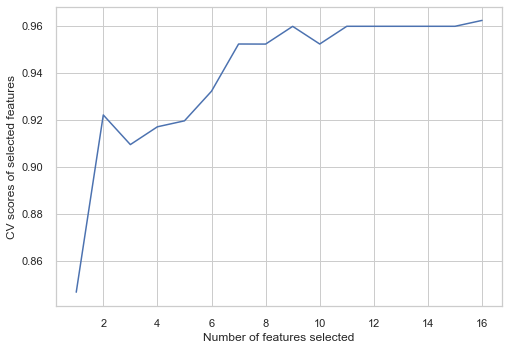

In [47]:
# Plot number of features vs cross-validation scores
num_features = [i for i in range(1, len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_

sns.set(style="whitegrid")
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel="Number of features selected", ylabel="CV scores of selected features")

### Feature Extraction using Principal Component Analysis

In [48]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)
X_train_norm = (X_train - X_train.mean())/(X_train.max() - X_train.min())
X_test_norm = (X_test - X_test.mean())/(X_test.max() - X_test.min())

Text(0, 0.5, 'Variance')

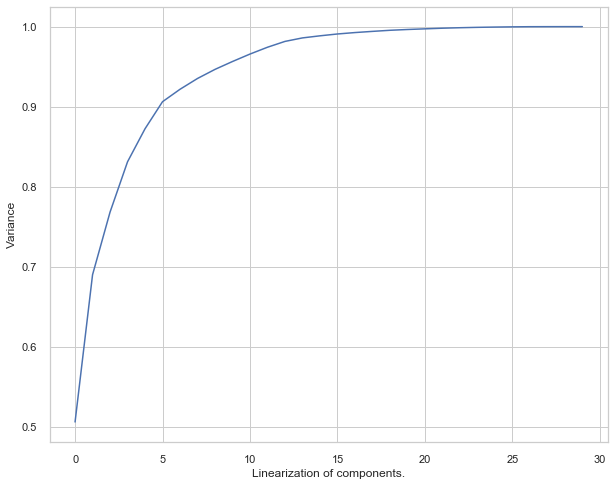

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_norm)
plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Linearization of components.')
plt.ylabel('Variance')